In [1]:
import tensorflow as tf
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow import keras
from keras.preprocessing import image_dataset
from tensorflow.keras.models import Model
from tensorflow.keras.applications import vgg19

from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB, BernoulliNB, ComplementNB
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import confusion_matrix

from PIL import Image
from PIL import UnidentifiedImageError

ModuleNotFoundError: No module named 'tensorflow'

A rotina de carregamento de imagens será feita através da biblioteca os, que é uma biblioteca que trabalha com arquivos locais e o comando utilizado que a lista de acordo com os arquivos presentes na pasta é o *listdir*.

In [ ]:
ak = os.listdir('/content/drive/MyDrive/Grapevine_Leaves_Image_Dataset/Ak')
ala_idris = os.listdir('/content/drive/MyDrive/Grapevine_Leaves_Image_Dataset/Ala_Idris')
buzgulo = os.listdir('/content/drive/MyDrive/Grapevine_Leaves_Image_Dataset/Buzgulu')
dimnit = os.listdir('/content/drive/MyDrive/Grapevine_Leaves_Image_Dataset/Dimnit')
nazli = os.listdir('/content/drive/MyDrive/Grapevine_Leaves_Image_Dataset/Nazli')

In [ ]:
# Qual é a resolução das imagens deste dataset?
img1 = Image.open("/content/drive/MyDrive/Grapevine_Leaves_Image_Dataset/Ak/Ak (1).png")
img2 = Image.open("/content/drive/MyDrive/Grapevine_Leaves_Image_Dataset/Ala_Idris/Ala_Idris (1).png")
img3 = Image.open("/content/drive/MyDrive/Grapevine_Leaves_Image_Dataset/Buzgulu/Buzgulu (1).png")
img4 = Image.open("/content/drive/MyDrive/Grapevine_Leaves_Image_Dataset/Dimnit/Dimnit (1).png")
img5 = Image.open("/content/drive/MyDrive/Grapevine_Leaves_Image_Dataset/Nazli/Nazli (1).png")

print('Resposta questão 2a:')
print(f'Resolução das folhas tipo "Ak": {img1.size} pixels\nResolução das folhas tipo "Ala Idris": {img2.size} pixels\nResolução das folhas tipo "Buzgulu":{img3.size} pixels\nResolução das folhas tipo "Dimnit":{img4.size} pixels\nResolução das folhas tipo "Nazli":{img5.size} pixels')

Resposta questão 2a:
Resolução das folhas tipo "Ak": (511, 511) pixels
Resolução das folhas tipo "Ala Idris": (511, 511) pixels
Resolução das folhas tipo "Buzgulu":(511, 511) pixels
Resolução das folhas tipo "Dimnit":(511, 511) pixels
Resolução das folhas tipo "Nazli":(511, 511) pixels


In [ ]:
imgw, imgh = 224,224 #tamanho final da imagem
X=[]
y=[]

In [ ]:
for i in ak:
  try:
    img = Image.open("/content/drive/MyDrive/Grapevine_Leaves_Image_Dataset/Ak/" + i).convert('RGB')
    img = img.resize((imgw,imgh)) #comando para redimensionar a imagem
    X.append(np.asarray(img))
    y.append(0)
  except UnidentifiedImageError:
    pass

In [ ]:
for i in ala_idris:
  try:
    img = Image.open("/content/drive/MyDrive/Grapevine_Leaves_Image_Dataset/Ala_Idris/" + i).convert('RGB')
    img = img.resize((imgw,imgh)) #comando para redimensionar a imagem
    X.append(np.asarray(img))
    y.append(1)
  except UnidentifiedImageError:
    pass

In [ ]:
for i in buzgulo:
  try:
    img = Image.open("/content/drive/MyDrive/Grapevine_Leaves_Image_Dataset/Buzgulu/" + i).convert('RGB')
    img = img.resize((imgw,imgh)) #comando para redimensionar a imagem
    X.append(np.asarray(img)) 
    y.append(2)
  except UnidentifiedImageError:
    pass

In [ ]:
for i in dimnit:
  try:
    img = Image.open("/content/drive/MyDrive/Grapevine_Leaves_Image_Dataset/Dimnit/" + i).convert('RGB')
    img = img.resize((imgw,imgh)) #comando para redimensionar a imagem
    X.append(np.asarray(img))
    y.append(3)
  except UnidentifiedImageError:
    pass

In [ ]:
for i in nazli:
  try:
    img = Image.open("/content/drive/MyDrive/Grapevine_Leaves_Image_Dataset/Nazli/" + i).convert('RGB')
    img = img.resize((imgw,imgh)) #comando para redimensionar a imagem
    X.append(np.asarray(img))
    y.append(4)
  except UnidentifiedImageError:
    pass

In [ ]:
X = np.asarray(X)
y = np.asarray(y)
print(X.shape, y.shape)
print(f'O tamanho das imagens transformado é: {X.shape[1]} pixels de largura e {X.shape[2]} pixels de altura')

(500, 224, 224, 3) (500,)
O tamanho das imagens transformado é: 224 pixels de largura e 224 pixels de altura


In [ ]:
# Quantas imagens por classe?
a = []
y = np.array(y)
__ , counts = np.unique(y, return_counts=True)
print('Resposta questão 2 b:')
print(f'O número de amostras presentes nas folhas "Ak" é: {counts[0]}')
print(f'O número de amostras presentes nas folhas "Ala Idris" é: {counts[1]}')
print(f'O número de amostras presentes nas folhas "Buzgulu" é: {counts[2]}')
print(f'O número de amostras presentes nas folhas "Dimnit" é: {counts[3]}')
print(f'O número de amostras presentes nas folhas "Nazli" é: {counts[4]}')

Resposta questão 2 b:
O número de amostras presentes nas folhas "Ak" é: 100
O número de amostras presentes nas folhas "Ala Idris" é: 100
O número de amostras presentes nas folhas "Buzgulu" é: 100
O número de amostras presentes nas folhas "Dimnit" é: 100
O número de amostras presentes nas folhas "Nazli" é: 100


In [ ]:
#normalização (aplicação de um filtro rgb)
x = X.astype('float32')
x /= 255

In [ ]:
print('Loading the VGG19 model ...')
model = tf.keras.applications.VGG19(include_top=True, weights='imagenet', input_shape=(224, 224, 3), classes=1000)
model = Model(inputs=model.input, outputs=model.get_layer(index=-2).output) # O modelo para na penultima camada, selecionando apenas as caracteristicas e não as probabilidades
model.summary()

prediction = np.array(model.predict(x))
x_pred = np.reshape(prediction, (prediction.shape[0], prediction.shape[1]))

print('\tFeatures in x prediction: ', x_pred.shape)

Loading the VGG19 model ...
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (N

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(x_pred,y, test_size=0.1, random_state = 10)

In [ ]:
print('\tTraining set shape: ', Xtrain.shape)
print('\tTesting set shape: ', Xtest.shape)

	Training set shape:  (450, 4096)
	Testing set shape:  (50, 4096)


In [ ]:
grid_dt = {
    'criterion' :['gini', 'entropy'],
    'random_state' : [None, 5, 10, 15, 20],
    'max_features':['auto', 'sqrt', 'log2',None],
    'max_depth': [i for i in range(1,10)],
}
dt = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=grid_dt, cv = 20)


In [ ]:
estimators = [GaussianNB(), BernoulliNB(), ComplementNB()]
def gridnb(estimator, xtrain, ytrain, xtest, ytest):
  results = []
  result_pred = []
  #O Naive Bayes não possui muitos parâmetros para serem implementados nas suas funções, mas para que seja utilizado o cross validation é necessário implementar um grid nulo, apenas para ele utilizar
  #as configurações padrões da classe
  grid_nb = {}
  for i in estimators:
    nb = GridSearchCV(estimator=i, param_grid=grid_nb, cv = 10)
    nb.fit(xtrain, ytrain)
    result = nb.predict(xtest)
    result_pred.append(result)
    accnb = accuracy_score(result, ytest)
    results.append(accnb)
  max_acc = max(results)
  max_acc_model = str(estimators[results.index(max_acc)]).strip('()')
  results_best_model = result_pred[results.index(max_acc)]
  return max_acc, max_acc_model, results_best_model

In [ ]:
pca = PCA(n_components = .9, svd_solver = 'full')
Xtrain1 = pca.fit_transform(Xtrain)
Xtest1 = pca.transform(Xtest)
#O PCA deve trabalhar com duas normalizações, a primeira normalização visa transformar os valores entre 0 e 1, e a segunda normalização é via o desvio padrão
#Houve a necessidade dos dois tipos de normalizações, visto que a árvore de decisão trabalha melhor com o StandardScaler do que o MinMaxScaler
Xtrain1_minmax, Xtrain1_std = MinMaxScaler().fit_transform(Xtrain1), StandardScaler().fit_transform(Xtrain1) 
Xtest1_minmax, Xtest1_std = MinMaxScaler().fit_transform(Xtest1), StandardScaler().fit_transform(Xtest1)

In [ ]:
print("Classification with Decision Tree ...")
dt.fit(Xtrain1_std, ytrain)
result = dt.predict(Xtest1_std)

accdt = accuracy_score(result, ytest)
print(f"\tAccuracy Decision Tree: {accdt:0.4f}")
print('\tBest parameters:')
print('\t', {str(dt.best_params_).strip(r"{'}")})

Classification with Decision Tree ...
	Accuracy Decision Tree: 0.6200
	Best parameters:
	 {"criterion': 'entropy', 'max_depth': 6, 'max_features': None, 'random_state': 10"}


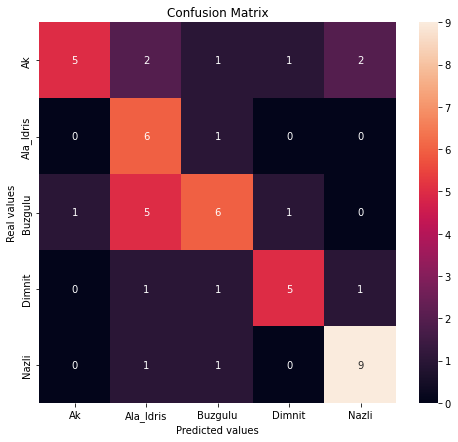

In [ ]:
cm = confusion_matrix(result, ytest)

cm_df = pd.DataFrame(cm,
                     index = ['Ak','Ala_Idris','Buzgulu','Dimnit','Nazli'], 
                     columns = ['Ak','Ala_Idris','Buzgulu','Dimnit','Nazli'])

plt.figure(figsize=(8,7))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Real values')
plt.xlabel('Predicted values')
plt.show()

In [ ]:
print('Classification with Naive Bayes...')
max_acc, max_acc_model, results = gridnb(estimators, Xtrain1_minmax, ytrain, Xtest1_minmax, ytest)

print(f'\tAccuracy Naive Bayes: {max_acc:0.4f}')
print('\tBest Model:', max_acc_model)

Classification with Naive Bayes...
	Accuracy Naive Bayes: 0.8200
	Best Model: ComplementNB


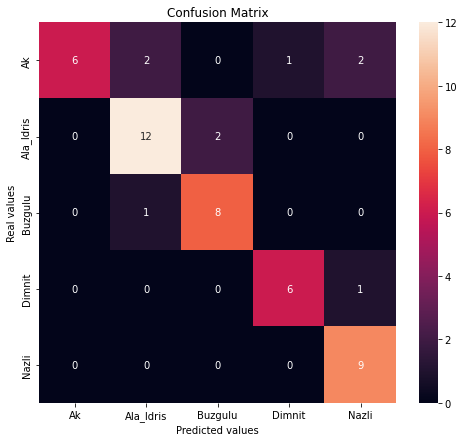

In [ ]:
cm = confusion_matrix(results, ytest)

cm_df = pd.DataFrame(cm,
                     index = ['Ak','Ala_Idris','Buzgulu','Dimnit','Nazli'], 
                     columns = ['Ak','Ala_Idris','Buzgulu','Dimnit','Nazli'])

plt.figure(figsize=(8,7))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Real values')
plt.xlabel('Predicted values')
plt.show()

In [ ]:
#avaliação de resultados
if accdt > max_acc:
  print('Best model: Decision Tree')
  print(f'Score: {100*accdt}%', )
  print(f'Diference between Naive Bayes: {100*(accdt - max_acc):.02f}%', )
else:
  print(f'Best model: {max_acc_model.strip("NB")} Naive Bayes ')
  print(f'Score: {100*max_acc}%', )
  print(f'Difference between Decision Tree: {100*(max_acc - accdt):.02f}%', )

Best model: Complement Naive Bayes 
Score: 82.0%
Difference between Decision Tree: 20.00%
